In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from sktime.datasets import load_basic_motions

# Import train and test sets

X_train, y_train = load_basic_motions(split = 'train', return_type = 'numpy3D')
X_test, y_test = load_basic_motions(split = 'test', return_type  = 'numpy3D')


In [8]:
# Print shapes

print(X_train.shape)
print(X_test.shape)

(40, 6, 100)
(40, 6, 100)


This means that we have:
- 40 individual time series
- 6 variables per series
- 100 time steps of observations

In [9]:
# Look at possible labels

y_train

array(['standing', 'standing', 'standing', 'standing', 'standing',
       'standing', 'standing', 'standing', 'standing', 'standing',
       'running', 'running', 'running', 'running', 'running', 'running',
       'running', 'running', 'running', 'running', 'walking', 'walking',
       'walking', 'walking', 'walking', 'walking', 'walking', 'walking',
       'walking', 'walking', 'badminton', 'badminton', 'badminton',
       'badminton', 'badminton', 'badminton', 'badminton', 'badminton',
       'badminton', 'badminton'], dtype='<U9')

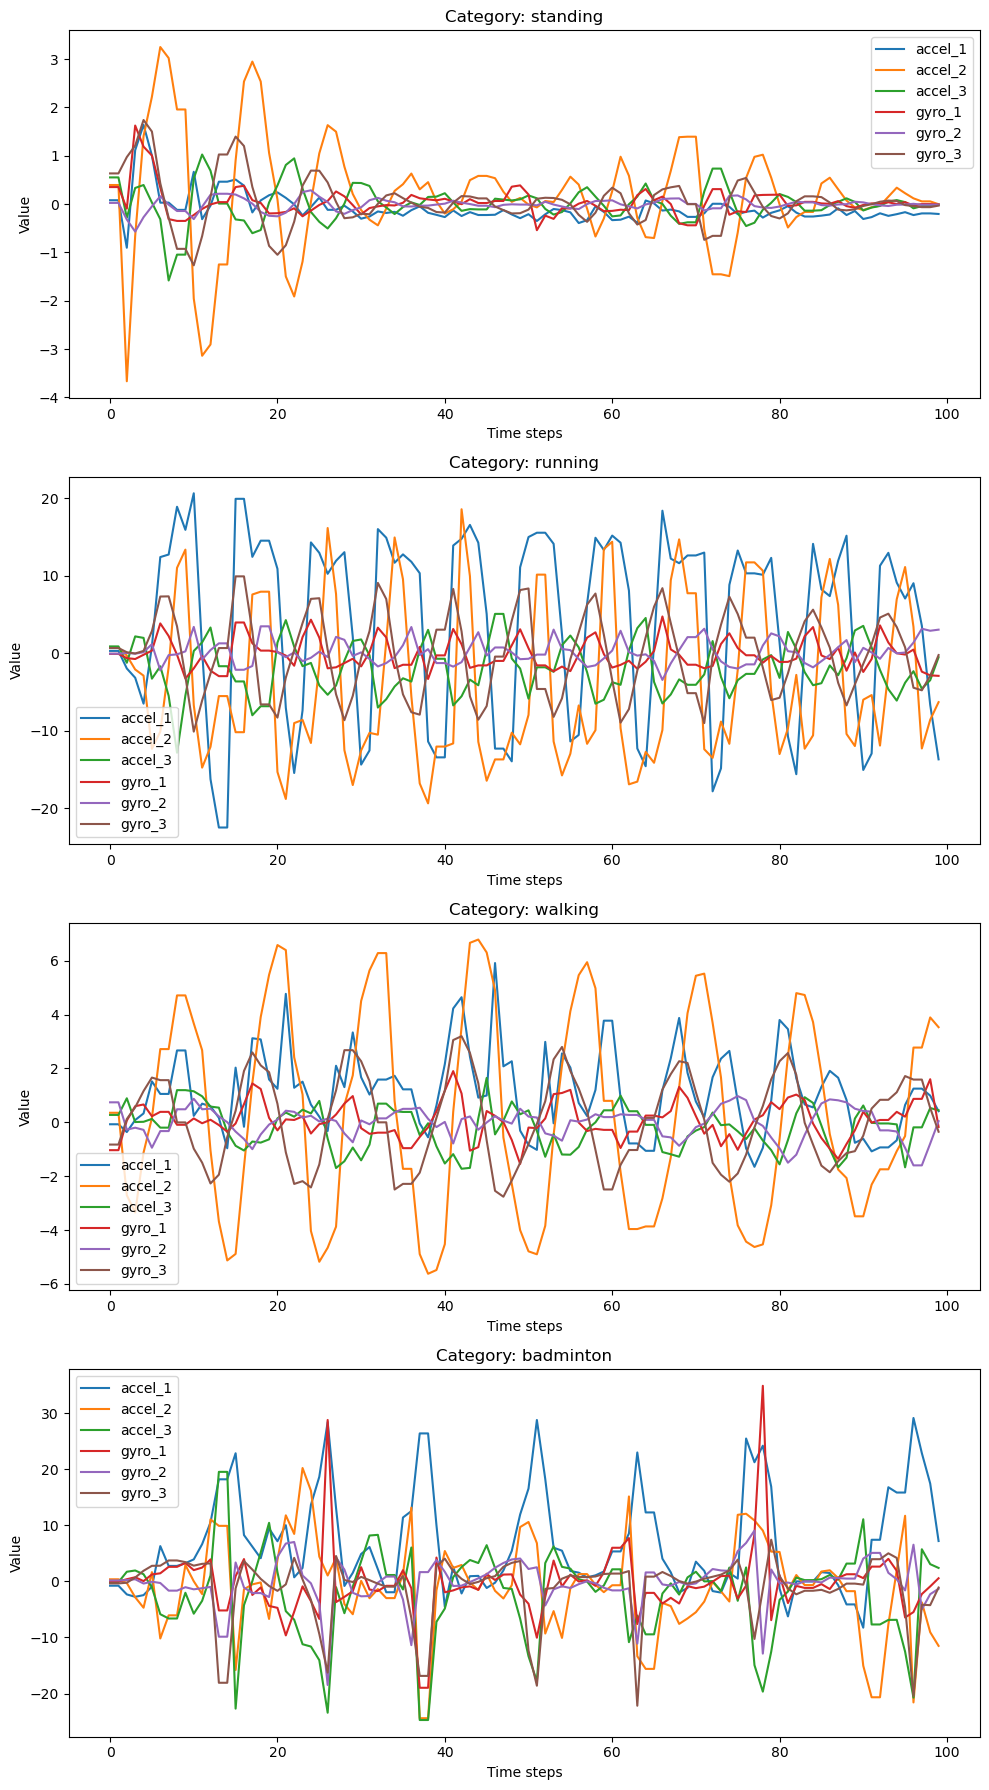

In [13]:
# Plot some features and labels

series_indices = [0,10,20,30]
categories = [ 'standing', 'running', 'walking', 'badminton']
features = ['accel_1', 'accel_2', 'accel_3', 'gyro_1', 'gyro_2', 'gyro_3']

selected_series = X_train[series_indices]

fig,axes = plt.subplots(4,1,figsize = (10,18))

for i in range(4):
    for j in range(selected_series.shape[1]):
        axes[i].plot(selected_series[i,j], label=features[j])
    axes[i].set_title(f'Category: {categories[i]}')
    axes[i].set_xlabel('Time steps')
    axes[i].set_ylabel('Value')
    axes[i].legend()
                      
plt.tight_layout()


## Baseline classifier

In [14]:
# Initialize DummyClassifier
from sktime.classification.dummy import DummyClassifier

clf = DummyClassifier(strategy = 'stratified', random_state = 42) # stratified keep equal the trainset and perdicition proportion

# Fit classifier
clf.fit(X_train, y_train)

DummyClassifier(random_state=42, strategy='stratified')

In [15]:
# Make predictions
y_pred = clf.predict(X_test)

### Evaluation

In [16]:
# Measure accuracy

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.225

## Benchmark of baselines 

In [17]:
# Test all baseline strategies
strategies = ['most_frequent', 'prior', 'stratified', 'uniform']

accuracy_scores = []

for strategy in strategies:
    clf = DummyClassifier(strategy = strategy, random_state = 42)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test,preds))

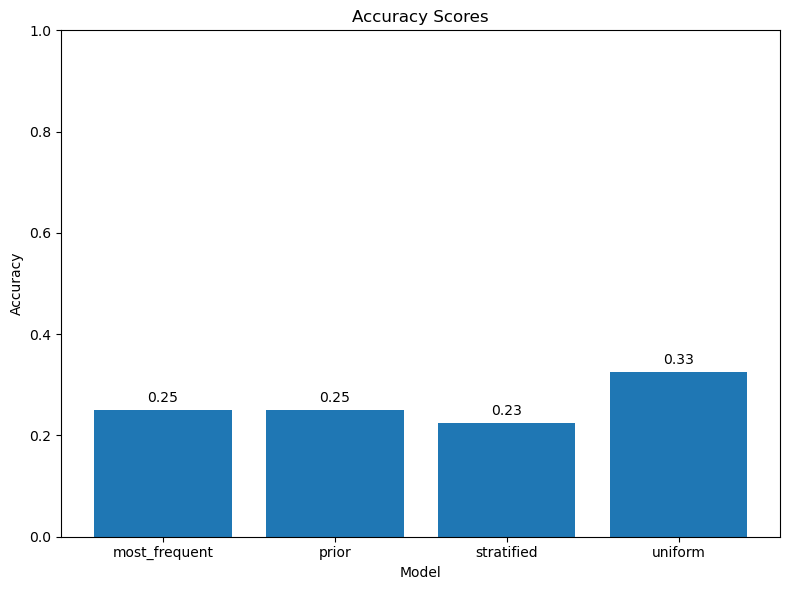

In [18]:
fig, ax = plt.subplots(figsize=(8,6))

bars = ax.bar(range(len(accuracy_scores)), accuracy_scores)

for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{score:.2f}', ha='center', va='bottom')

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Scores')
ax.set_ylim(0, 1)
ax.set_xticks(range(len(accuracy_scores)), strategies)

plt.tight_layout()